In [1]:
import sys
sys.path.append("../../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 5
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-combined'
MODEL_NAME = 'bert-base-multilingual-uncased'
dir = '../../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'
class_names = ['Disability', 'Gender/Sexual', 'Origin/Nationality', 'Race/Ethnicity', 'Religion']

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_df = train_df[train_df['class'] != 0]
val_df = val_df[val_df['class'] != 0]
test_df = test_df[test_df['class'] != 0]

english_train_texts = train_df['english_text'].values
english_val_texts = val_df['english_text'].values
english_test_texts = test_df['english_text'].values

english_train_labels = train_df[class_names].values
english_val_labels = val_df[class_names].values
english_test_labels = test_df[class_names].values

urdu_train_texts = train_df['urdu_text'].values
urdu_val_texts = val_df['urdu_text'].values
urdu_test_texts = test_df['urdu_text'].values

urdu_train_labels = train_df[class_names].values
urdu_val_labels = val_df[class_names].values
urdu_test_labels = test_df[class_names].values

sindhi_train_texts = train_df['sindhi_text'].values
sindhi_val_texts = val_df['sindhi_text'].values
sindhi_test_texts = test_df['sindhi_text'].values

sindhi_train_labels = train_df[class_names].values
sindhi_val_labels = val_df[class_names].values
sindhi_test_labels = test_df[class_names].values

english_train_texts = [hlp.preprocess_text(text, language="english") for text in english_train_texts]
english_val_texts = [hlp.preprocess_text(text, language="english") for text in english_val_texts]
english_test_texts = [hlp.preprocess_text(text, language="english") for text in english_test_texts]

urdu_train_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_train_texts]
urdu_val_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_val_texts]
urdu_test_texts = [hlp.preprocess_text(text, language="urdu") for text in urdu_test_texts]

sindhi_train_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_train_texts]
sindhi_val_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_val_texts]
sindhi_test_texts = [hlp.preprocess_text(text, language="sindhi") for text in sindhi_test_texts]

train_texts = np.concatenate([english_train_texts, urdu_train_texts, sindhi_train_texts])
val_texts = np.concatenate([english_val_texts, urdu_val_texts, sindhi_val_texts])
test_texts = np.concatenate([english_test_texts, urdu_test_texts, sindhi_test_texts])

train_labels = np.concatenate([english_train_labels, urdu_train_labels, sindhi_train_labels])
val_labels = np.concatenate([english_val_labels, urdu_val_labels, sindhi_val_labels])
test_labels = np.concatenate([english_test_labels, urdu_test_labels, sindhi_test_labels])

In [4]:
#shuffle data
train_texts, train_labels = hlp.shuffle_data(train_texts, train_labels)
val_texts, val_labels = hlp.shuffle_data(val_texts, val_labels)
test_texts, test_labels = hlp.shuffle_data(test_texts, test_labels)

In [5]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

like really kind christian woman friend dads really tripping right like dont make shit children justify hatred trans people [0 0 0 0 1]
reallyvirtual میں نے کرن ساتھ نلی جانتے جب میں نے میں نے دیکھا [0 0 0 1 0]
nahhhh what a retard hahah url [0 0 0 0 0]
هوءَ پريشان ٿي ويندي آهي جيڪڏهن هن کي ڪچي چوان پوءِ tf هوءَ ڪم ڪندي جڏهن ان کي بعد ۾ چوان [0 1 0 0 0]
precisely amp literallythe one dies without engaged jihad thought within dies portion hypocrisy muslim amp abu dwd [0 0 0 0 1]


In [6]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model_multi(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 0/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:33<00:00,  5.28it/s, loss=0.174] 


Train loss 0.16455560249383672 accuracy 0.7485262245340268
Validation loss 0.13102732801697606 accuracy 0.8089200962226123
Model and tokenizer saved at epoch 0
Checkpoint saved: Improved validation accuracy at epoch 0: 0.8089200962226123
Epoch 1/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:33<00:00,  5.28it/s, loss=0.193] 


Train loss 0.1218029049570038 accuracy 0.8275032509752925
Validation loss 0.12640922708657576 accuracy 0.8252714387881152
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8252714387881152
Epoch 2/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:33<00:00,  5.27it/s, loss=0.153] 


Train loss 0.10660719997075163 accuracy 0.8566211530125705
Validation loss 0.1300270168377927 accuracy 0.8345686236265523
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8345686236265523
Epoch 3/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.26it/s, loss=0.125] 


Train loss 0.0916695250340333 accuracy 0.8821629822280017
Validation loss 0.14303835168511853 accuracy 0.8383395097847994
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.8383395097847994
Epoch 4/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.25it/s, loss=0.0881]


Train loss 0.07854143891421543 accuracy 0.9022106631989597
Validation loss 0.1613467126124366 accuracy 0.8427605487289513
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8427605487289513
Epoch 5/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.25it/s, loss=0.0903]


Train loss 0.06711908087428871 accuracy 0.9198634590377113
Validation loss 0.1786992688762051 accuracy 0.8460113126584747
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.8460113126584747
Epoch 6/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:35<00:00,  5.24it/s, loss=0.0598]


Train loss 0.0578358048152039 accuracy 0.9327698309492848
Validation loss 0.18072871936643942 accuracy 0.8441258695793511
No improvement in validation accuracy for 1 epochs.
Epoch 7/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.25it/s, loss=0.0636] 


Train loss 0.04971548253118129 accuracy 0.9434763762462072
Validation loss 0.18484903095201 accuracy 0.8449060529224368
No improvement in validation accuracy for 2 epochs.
Epoch 8/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:33<00:00,  5.28it/s, loss=0.0551] 


Train loss 0.042821730650449884 accuracy 0.9525465973125271
Validation loss 0.2015064200754287 accuracy 0.8436707626292179
No improvement in validation accuracy for 3 epochs.
Epoch 9/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.25it/s, loss=0.0367] 


Train loss 0.03711881866548133 accuracy 0.9586042479410489
Validation loss 0.22367242413520688 accuracy 0.8417203042715038
No improvement in validation accuracy for 4 epochs.
Epoch 10/50
----------


Training Progress: 100%|██████████| 1442/1442 [04:34<00:00,  5.25it/s, loss=0.018]  


Train loss 0.03216154874404492 accuracy 0.9645643693107933
Validation loss 0.21856644042533302 accuracy 0.84120018204278
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


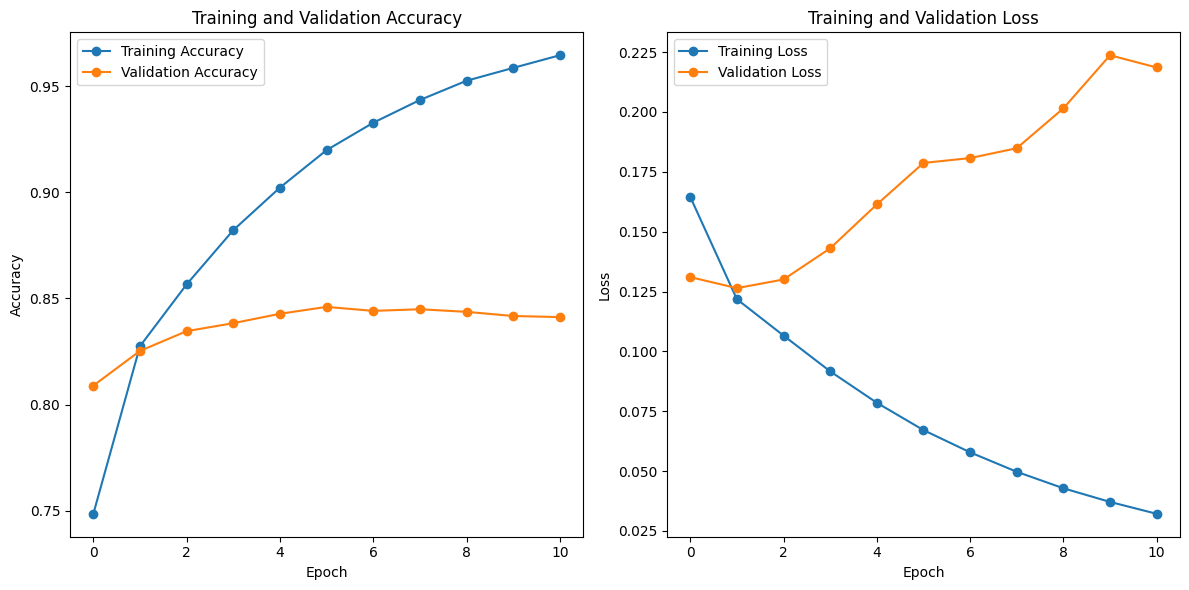

In [8]:
hlp.plot_history(history)

In [9]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model_multi(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc:.2f} Test Loss: {test_loss}')

Test Accuracy: 0.84 Test Loss: 0.225549879679437


Accuracy: 0.84
F1 Score: 0.84
Precision: 0.84
Recall: 0.84

Classification Report:
                    precision    recall  f1-score   support

        Disability       0.37      0.14      0.20       536
     Gender/Sexual       0.84      0.80      0.82     10984
Origin/Nationality       0.42      0.67      0.52       254
    Race/Ethnicity       0.81      0.85      0.83      9775
          Religion       0.89      0.92      0.91      9213

          accuracy                           0.84     30762
         macro avg       0.67      0.68      0.66     30762
      weighted avg       0.84      0.84      0.84     30762



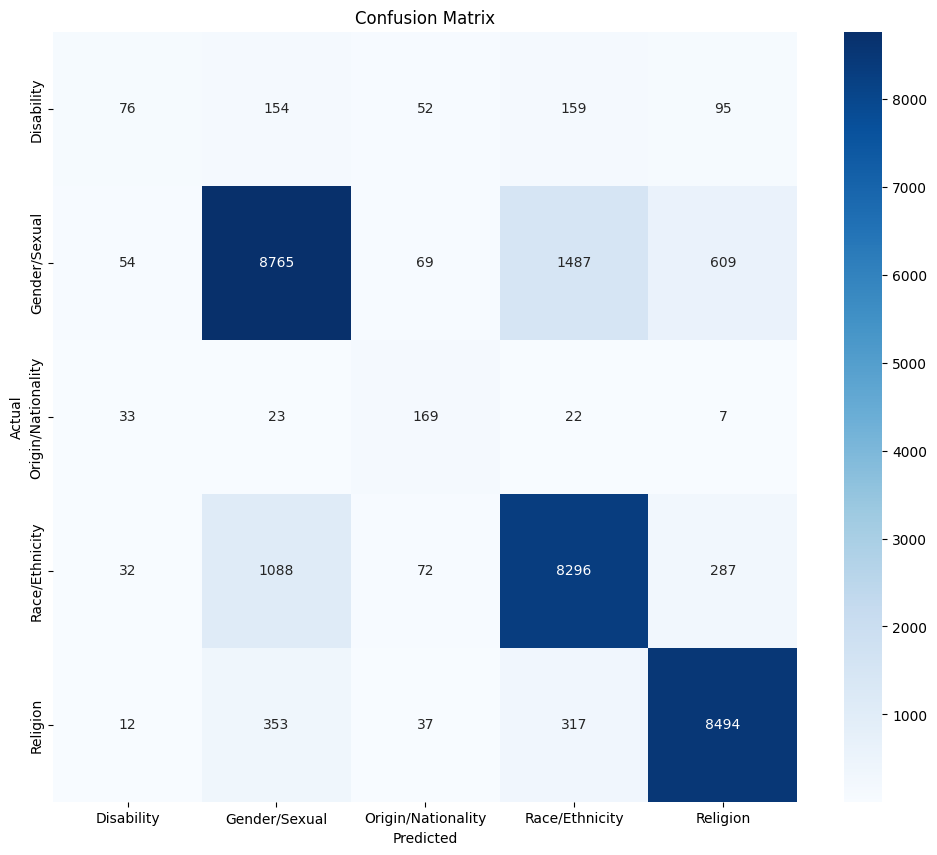

In [10]:
hlp.plot_confusion_matrix(np.argmax(test_label_actual, axis=1), np.argmax(test_label_pred, axis=1), class_names)

In [11]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Origin/Nationality with confidence: 1.00


In [12]:
test_texts = ["Muslims are pathetic they are not humans fuck"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

index = list(confidence[0]).index(np.array(confidence[0]).max())

print(f"The predicted class is: {class_names[index]} with confidence: {confidence[0][index]:.2f}")

The predicted class is: Religion with confidence: 1.00
